In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Setup
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
df = pd.read_csv("netflix_titles.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### **Insights of DATA :-**
#### `director` column has most **missing values**
#### then `cast` and `country`
#### `date_added` , `rating` and `duration` has less amount of **missing values**
#### Most common Data type :- **`object`**

In [8]:
# Filling Missing Values :-
# Fill or Drop missing values where necessary

df['director'] = df['director'].fillna("Not given")
df['cast'] = df['cast'].fillna("Not given")
df['country'] = df['country'].fillna("Unknown")

In [9]:
# df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added'] = pd.to_datetime(df["date_added"] , errors='coerce')

# error='coerce' will convert Nan to NaT (not a time ) and it will also not throw error if value is Nan

## **EDA (Exploratory Data Analysis)**

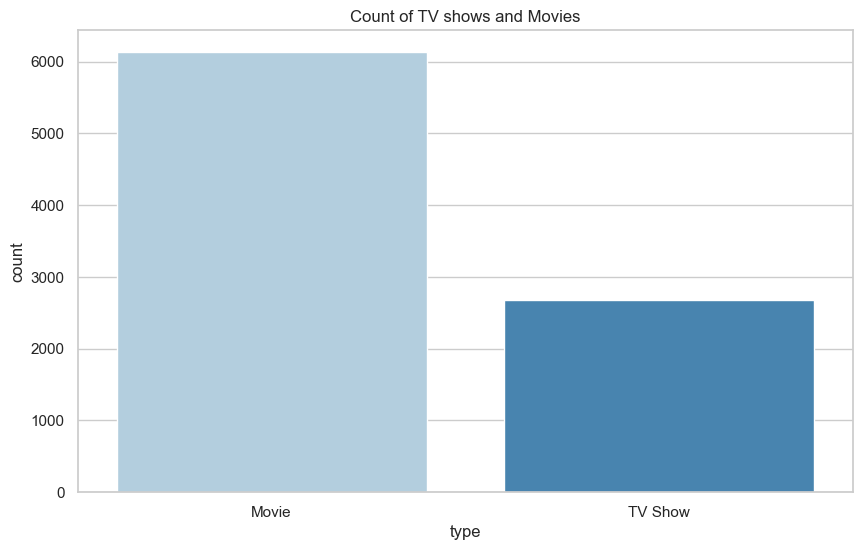

In [11]:
# 1. Count of Movies vs TV Shows
sns.countplot(data=df,x='type',hue='type',palette='Blues')
plt.title("Count of TV shows and Movies")
plt.show()

In [12]:
from collections import Counter

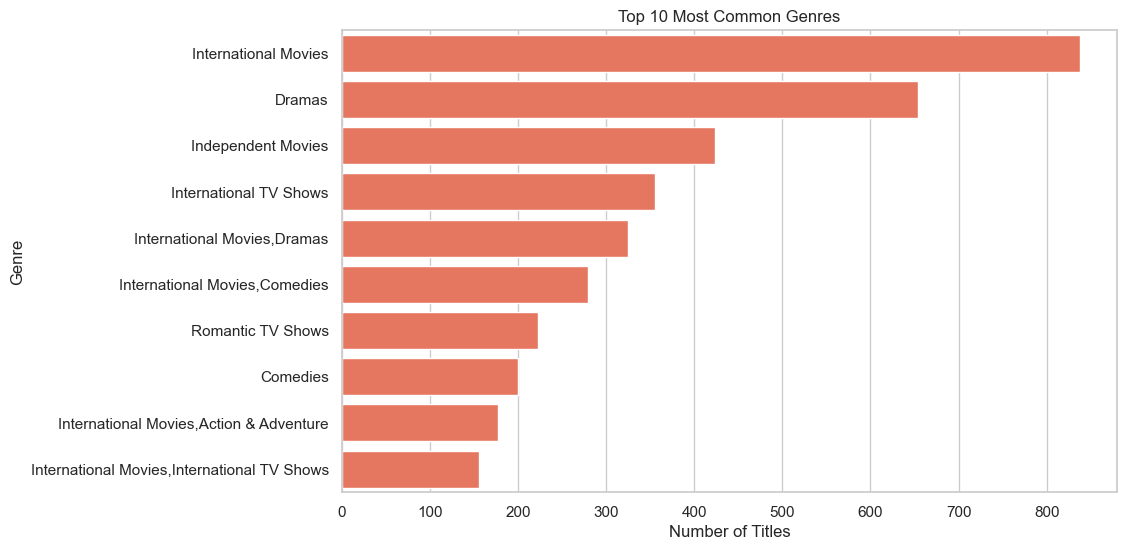

In [13]:
# 2. Top 10 Genres (listed under 'listed_in')
genre = ",".join(df['listed_in'].dropna()).split(", ")
genre_counts = Counter(genre)

# 👇 Dummy 'Category' column added to use `palette` without warning (required from Seaborn v0.14+)
top_genres_df = pd.DataFrame(genre_counts.most_common(10), columns=["Genre", "Count"])
top_genres_df["Category"] = "Top 10"

sns.barplot(data=top_genres_df, x="Count", y="Genre", hue="Category", palette="Reds", legend=False)
plt.title("Top 10 Most Common Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

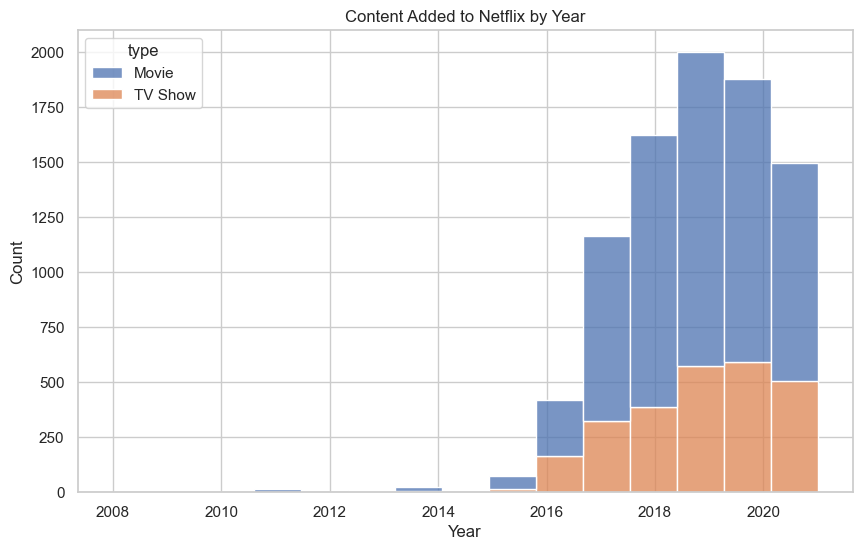

In [14]:
# 3. Content added over the years

df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month
sns.histplot(data=df, x="year_added", hue="type", multiple="stack", bins=15)
plt.title("Content Added to Netflix by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='country'>

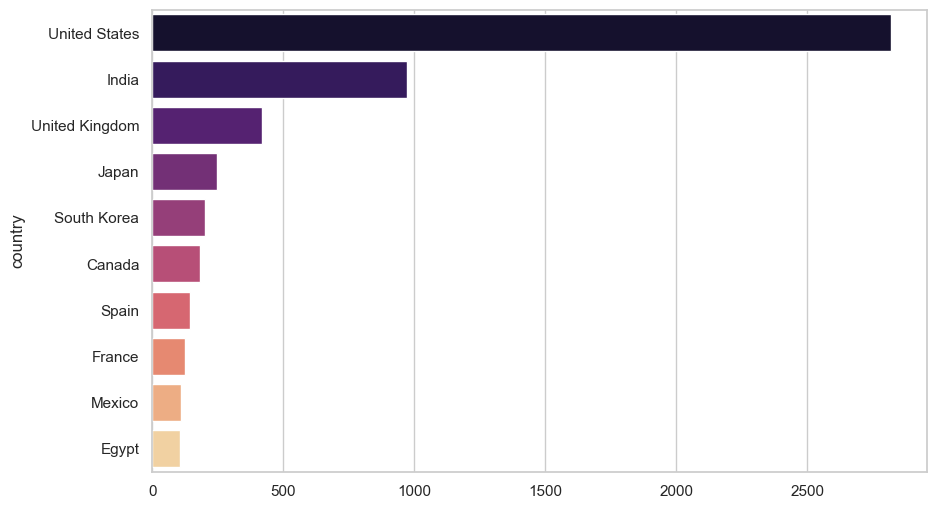

In [15]:
# 4. Countries with most content
top_countries = df[df["country"] != "Unknown"]["country"].value_counts().head(10)
sns.barplot(y=top_countries.index,x=top_countries.values,hue=top_countries.index,palette="magma")
# Hue is dummy in this case , just wrote to avoid warning 

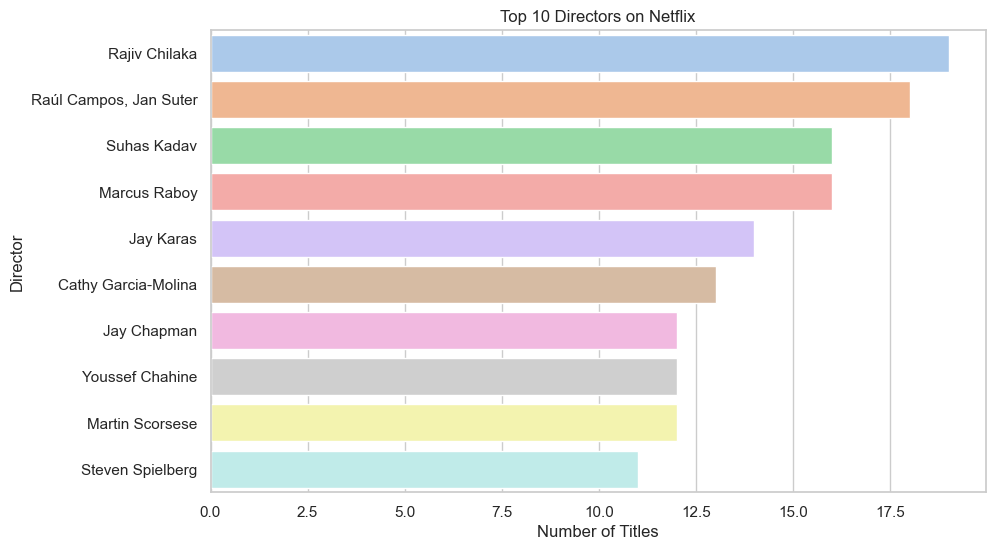

In [16]:
# 5. Most frequent directors

directors = df["director"].value_counts().drop("Not given").head(10)
sns.barplot(y=directors.index, x=directors.values,hue=directors.index,palette='pastel')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()